In [ ]:
# Brownian v2 and v3 in this file. v2 is just for archival purpose. Use v3 for multiprocessing.

In [5]:
import random, matplotlib.pyplot as plt, time, math, multiprocessing, concurrent.futures
import numpy as np

#plt.style.use(['science'])

def flatten(xss):
    return [x for xs in xss for x in xs]

gamma,Radius_of_circle=1,1
sigma,potential_constant,time2=0.0001,1,100

ram0=1024
def brownian_v3(drift,iterations):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time2]
    if drift<potential_constant:
        intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    else:
        intial_pos=1.0
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time2/dt) #Total time
    std=np.sqrt(dt*sigma)
    
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(-np.sin(theta))/Radius_of_circle)*dt)
            
        theta2=theta-np.floor((theta-np.pi)/(2*np.pi))*2*np.pi-2*np.pi
        
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time2
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()


    return cur #D


#f __name__ == "__main__":
#   iterations=10**1
    
#   with concurrent.futures.ProcessPoolExecutor() as executor:
#       start_time = time.perf_counter()
#       temp = list(executor.map(brownian_v3, [10 for i in range(int(iterations/10))]))
#       finish_time = time.perf_counter()
#   print(f"Program finished in {finish_time-start_time} seconds")
    

#results = [[temp[j][i] for j in range(len(temp))] for i in range(len(temp[0]))]
#pos = flatten(results[0])
#cur = flatten(results[1])

#print(len(cur))



<function matplotlib.pyplot.show(close=None, block=None)>

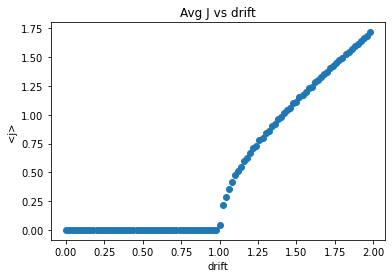

In [8]:
start_drift=0
end_drift=2
num_points=100

avgx=[]
avgy=[]

for i in range(num_points):

    u=start_drift+(end_drift-start_drift)/num_points*i
    
    avgx.append(u)
    avg=brownian_v3(u,10)
    avgy.append(sum(avg)/len(avg))

plt.scatter(avgx,avgy)

plt.title('Avg J vs drift')
plt.xlabel('drift')
plt.ylabel('<j>')

plt.show